In [26]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
import os

# Data Preprocessing

In [76]:
data = pd.read_csv('data/dataset.csv', index_col=0)
data = data.drop_duplicates()
features = ['track_name', 'artists', 'track_genre', 'danceability', 'acousticness', 'valence', 'tempo', 'loudness']
X = data[features].copy()
X.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['danceability', 'acousticness', 'valence', 'tempo', 'loudness']])

# Normalize standardized data (for cosine distance metric)
X_scaled_cos = X_scaled / np.linalg.norm(X_scaled, axis=1)[:, np.newaxis]

In [86]:
num_clusters = list(range(2, 15))

# Elbow Plot - Determine Optimal Number of Clusters
Create a plot of clusters against distortion (average of inertia)

## Euclidean Distance Clustering

In [87]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

distortion = []
davies = []
calinskis = []
for i in tqdm(num_clusters):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    fitted_model = model.fit(X_scaled)
    distortion.append(fitted_model.inertia_ / X_scaled.shape[0])
    davies.append(davies_bouldin_score(X_scaled, fitted_model.predict(X_scaled)))
    calinskis.append(calinski_harabasz_score(X_scaled, fitted_model.predict(X_scaled)))

  0%|          | 0/13 [00:00<?, ?it/s]

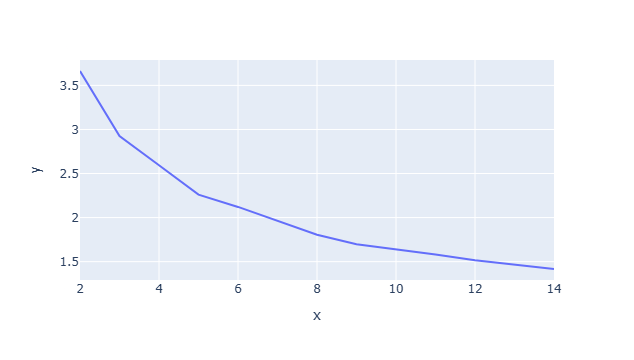

In [88]:
px.line(x=num_clusters, y=distortion)

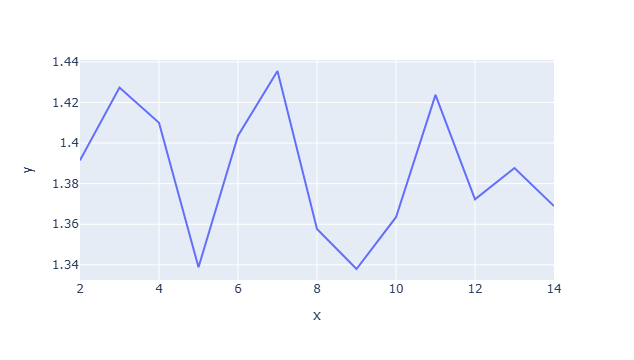

In [89]:
px.line(x=num_clusters,y=davies)

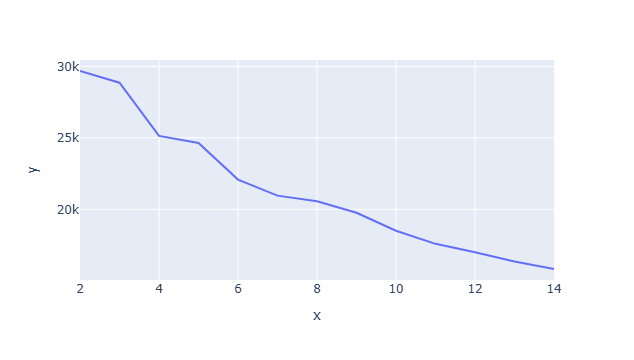

In [90]:
px.line(x=num_clusters,y=calinskis)

## Cosine Distance Clustering

In [82]:
cosDistortion = []
cosDavies = []
cosCalinskis = []
for i in tqdm(num_clusters):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    fitted_model = model.fit(X_scaled_cos)
    cosDistortion.append(fitted_model.inertia_ / X_scaled_cos.shape[0])
    distortion.append(fitted_model.inertia_ / X_scaled_cos.shape[0])
    cosDavies.append(davies_bouldin_score(X_scaled_cos, fitted_model.predict(X_scaled_cos)))
    cosCalinskis.append(calinski_harabasz_score(X_scaled_cos, fitted_model.predict(X_scaled_cos)))

  0%|          | 0/23 [00:00<?, ?it/s]

In [83]:
px.line(x=num_clusters, y=cosDistortion)

In [84]:
px.line(x=num_clusters,y=cosDavies)

In [85]:
px.line(x=num_clusters,y=cosCalinskis)